In [532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#regression lineaire
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [533]:
df=pd.read_csv("kc_house_data.csv")

In [534]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [536]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [537]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [538]:
#selectionne les caracteristique qui sonnt le plus correler avec le prix 
corr_matrix = df.corr()["price"]
corr_matrix

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [539]:
corr_matrix = corr_matrix.sort_values(ascending=False)
corr_matrix

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [540]:
print(corr_matrix.head())

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
Name: price, dtype: float64


In [541]:
corr_matrix[corr_matrix<1]


sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'price'),
  Text(1, 0, 'sqft_living'),
  Text(2, 0, 'grade'),
  Text(3, 0, 'sqft_above'),
  Text(4, 0, 'sqft_living15'),
  Text(5, 0, 'bathrooms'),
  Text(6, 0, 'view'),
  Text(7, 0, 'sqft_basement'),
  Text(8, 0, 'bedrooms'),
  Text(9, 0, 'lat'),
  Text(10, 0, 'waterfront'),
  Text(11, 0, 'floors'),
  Text(12, 0, 'yr_renovated'),
  Text(13, 0, 'sqft_lot'),
  Text(14, 0, 'sqft_lot15'),
  Text(15, 0, 'yr_built'),
  Text(16, 0, 'condition'),
  Text(17, 0, 'long'),
  Text(18, 0, 'id'),
  Text(19, 0, 'zipcode')])

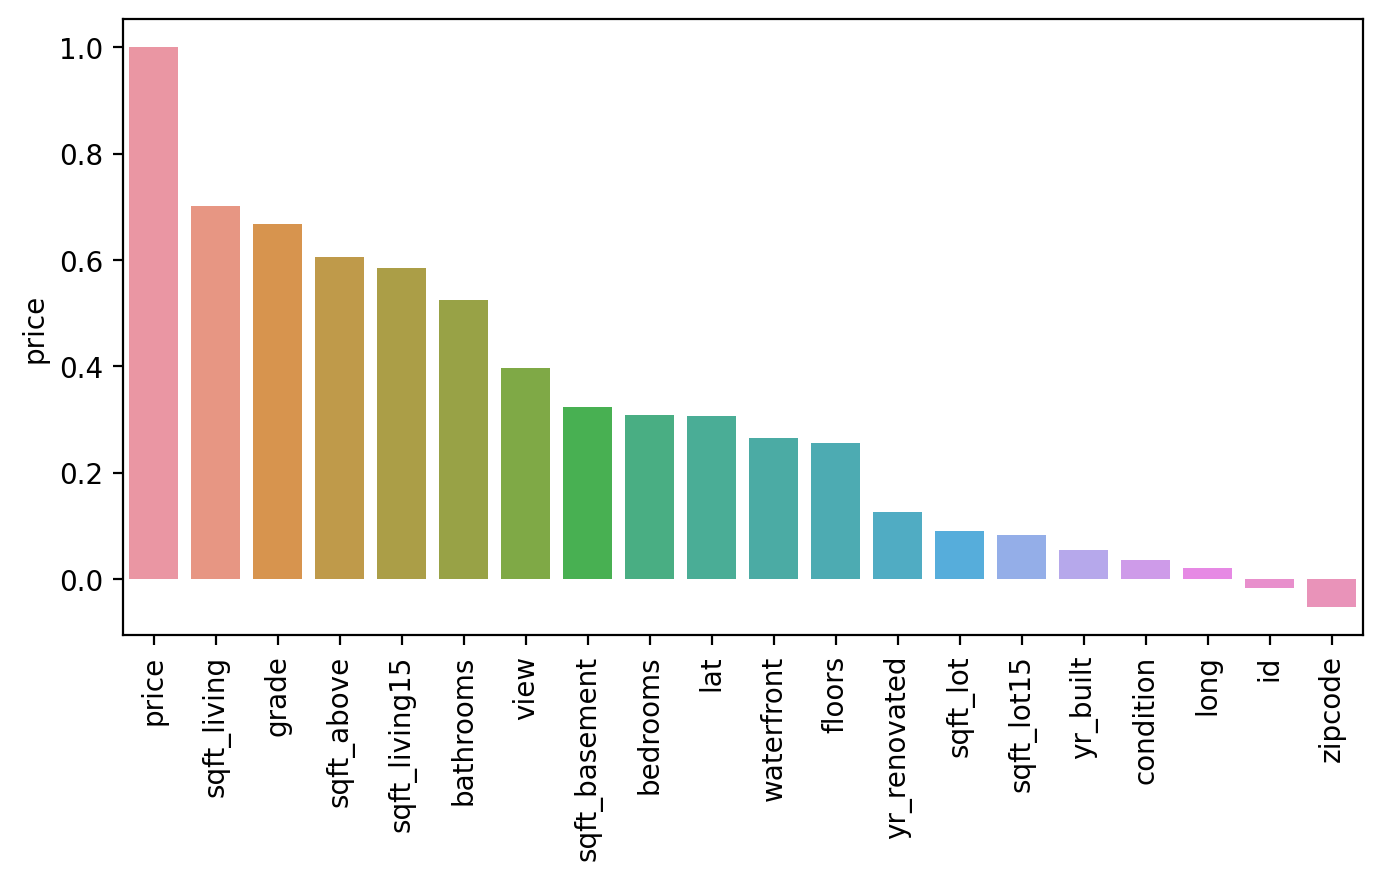

In [542]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=corr_matrix.index,y=corr_matrix)
plt.xticks(rotation=90)


In [543]:
(0.175123/100)*len(df)

37.849333990000005

In [544]:
#supprimer les caracteristique 
df.drop(['yr_renovated','long','date','id','sqft_lot','sqft_lot15','condition','zipcode','yr_renovated','sqft_lot','sqft_lot15'],axis=1,inplace =True)

In [545]:
#df['view'].unique()

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  sqft_living15  21613 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 2.1 MB


In [547]:
X=df['sqft_living']
y=df['price']
np.polyfit(X,y,1)

array([   280.6235679 , -43580.74309447])

In [548]:
# Budgets potentiels de dépenses futures
potential_spend = np.linspace(0,9000,100)
predicted_sales =  280.6235679*potential_spend +43580.74309447

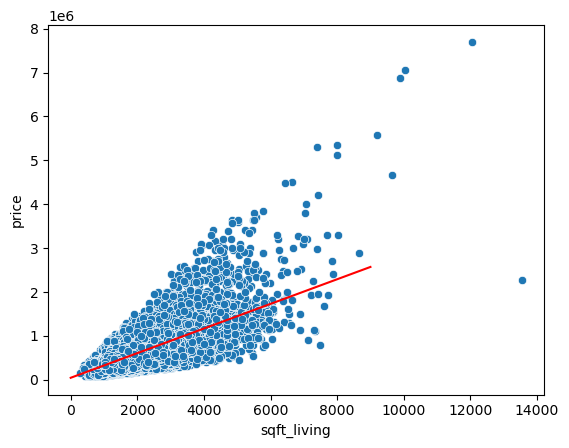

In [549]:
sns.scatterplot(x='sqft_living',y='price',data=df)
plt.plot(potential_spend,predicted_sales,color='red');

In [550]:
#x = df.drop('price', axis=1)

In [551]:
x = df[["sqft_living"]]

In [552]:
y=df['price']

In [553]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [554]:
model=LinearRegression()

In [555]:
model.fit(x_train,y_train) 

LinearRegression()

In [556]:
predicted=model.predict(x_test)

In [557]:
print("MSE", mean_squared_error(y_test,predicted))


MSE 62902408306.86502


In [558]:
print("R squared", metrics.r2_score(y_test,predicted))


R squared 0.4996528488387417


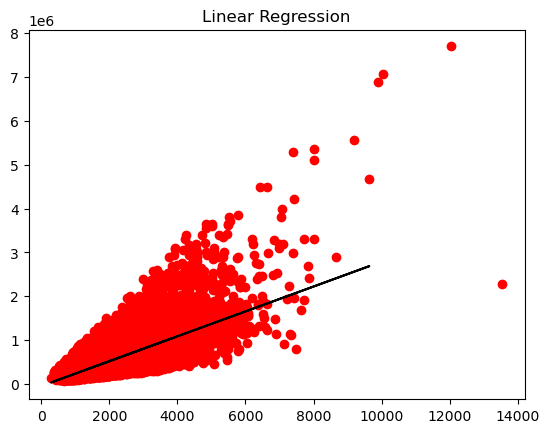

In [559]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("")
plt.xlabel("")
plt.plot(x_test,predicted,color="k")
plt.show()

In [560]:
score = model.score(x_test, y_test)
print("R² sur l'ensemble de test :", score)

R² sur l'ensemble de test : 0.4996528488387417


In [571]:
# Score de la régression linéaire simple
simple_model = LinearRegression()
simple_model.fit(x_train, y_train)
simple_score = simple_model.score(x_test, y_test)

In [572]:
simple_score = simple_model.score(x_test, y_test)

# Score de la régression linéaire multiple
multiple_score = model.score(x_test, y_test)

print("Score de la régression linéaire simple : ", simple_score)
print("Score de la régression linéaire multiple : ", multiple_score)

Score de la régression linéaire simple :  0.4996528488387417
Score de la régression linéaire multiple :  0.4996528488387417


In [573]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_score = poly_model.score(X_poly_test, y_test)
print("Score de la régression polynomiale:", poly_score)

Score de la régression polynomiale: 0.5406078367860319
